In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casperfpga
import time
from lwa_f import snap2_fengine
from lwa_f import blocks
#from lwautils import lwa_arx 
import pandas as pd
from cr_functions import *
import struct
import math
from scipy import special as sp
from scipy import optimize as oz
from scipy import stats as st
from lwa_antpos import mapping
import os

dsautils.cnf not found. skipping...
Read antpos from etcd


In [2]:
#filenames to save

fnameout='/home/ubuntu/kp/data/test/coincident_trigger_threshold_scan.npy'
fnamec='/home/ubuntu/kp/data/test/individual-antenna-scans-c.npy'
fnamev='/home/ubuntu/kp/data/test/individual-antenna-scans-v.npy'



In [3]:
brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
#casperbrds = [casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport) for brdname in brdnames]
casperbrds = [snap2_fengine.Snap2FengineEtcd(brdname).fpga for brdname in brdnames]

#this file but it has the necessary info for the ethernet block
fpgfile='/home/ubuntu/kp/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c.fpg'



2024-08-14 20:23:42,791 - lwa_f.blocks.block:snap01 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,796 - lwa_f.blocks.block:snap02 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,801 - lwa_f.blocks.block:snap03 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,808 - lwa_f.blocks.block:snap04 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,813 - lwa_f.blocks.block:snap05 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,834 - lwa_f.blocks.block:snap06 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,839 - lwa_f.blocks.block:snap07 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,845 - lwa_f.blocks.block:snap08 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-08-14 20:23:42,862 - lwa_f.blocks.block:snap09 - INFO - eth - Couldn't find Ethernet core. 

In [4]:
casperbrds[0].listdev()


['aaa_onegbe_one_GbE',
 'adc_sync',
 'ads5296_controller0_0',
 'ads5296_controller0_1',
 'ads5296_controller1_0',
 'ads5296_controller1_1',
 'ads5296_hardware_rst0',
 'ads5296_hardware_rst1',
 'ads5296_spi_controller0',
 'ads5296_spi_controller1',
 'ads5296_wb_ram0_0_0',
 'ads5296_wb_ram0_0_1',
 'ads5296_wb_ram0_0_2',
 'ads5296_wb_ram0_0_3',
 'ads5296_wb_ram0_1_0',
 'ads5296_wb_ram0_1_1',
 'ads5296_wb_ram0_1_2',
 'ads5296_wb_ram0_1_3',
 'ads5296_wb_ram1_0_0',
 'ads5296_wb_ram1_0_1',
 'ads5296_wb_ram1_0_2',
 'ads5296_wb_ram1_0_3',
 'ads5296_wb_ram1_1_0',
 'ads5296_wb_ram1_1_1',
 'ads5296_wb_ram1_1_2',
 'ads5296_wb_ram1_1_3',
 'autocorr_acc_cnt',
 'autocorr_acc_len',
 'autocorr_common_dout0_bram',
 'autocorr_common_dout1_bram',
 'autocorr_common_dout2_bram',
 'autocorr_common_dout3_bram',
 'autocorr_common_dout4_bram',
 'autocorr_common_dout5_bram',
 'autocorr_common_dout6_bram',
 'autocorr_common_dout7_bram',
 'autocorr_mux_sel',
 'autocorr_trig',
 'chan_reorder_dynamic_map1',
 'corr_0_

## Single-antenna threshold scans

In [5]:
t1=time.time()

thresholds = 8*np.asarray(range(64))
vthresholds = np.flip(thresholds)
results_core = np.zeros((64,64,11))
results_veto = np.zeros((64,64,11))

[setup_data_source(casperbrd,"adc") for casperbrd in casperbrds]


for i in range(len(thresholds)):
    t_c = thresholds[i]
    t_v = vthresholds[i]
    [setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t_c**2)) for casperbrd in casperbrds]
    [setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int(t_v**2)) for casperbrd in casperbrds]
    time.sleep(2.75)  #have to wait for it to update
    
    #read results for this threshold
    for b, casperbrd in enumerate(casperbrds):
        core,veto = read_threshold_rates(casperbrd)
        results_core[:,i,b] = core
        results_veto[:,i,b] = veto

t2=time.time()
print('Duration ',t2-t1)

Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Duration  664.1542799472809


In [93]:
##############

In [6]:
np.save(fnamec,results_core)
np.save(fnamev,results_veto)

LWA-002A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 432x288 with 0 Axes>

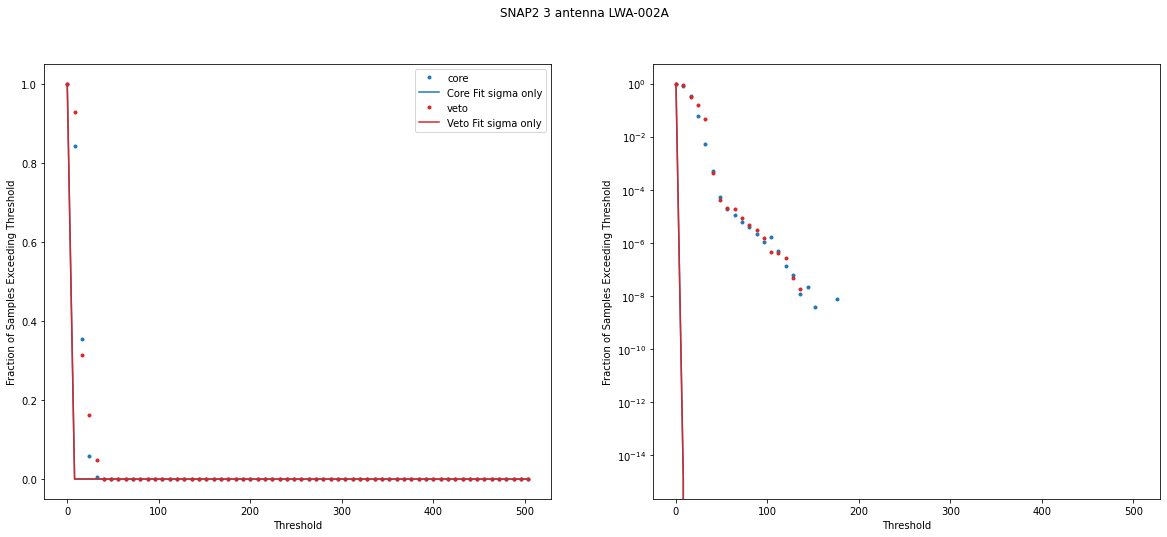

LWA-002B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


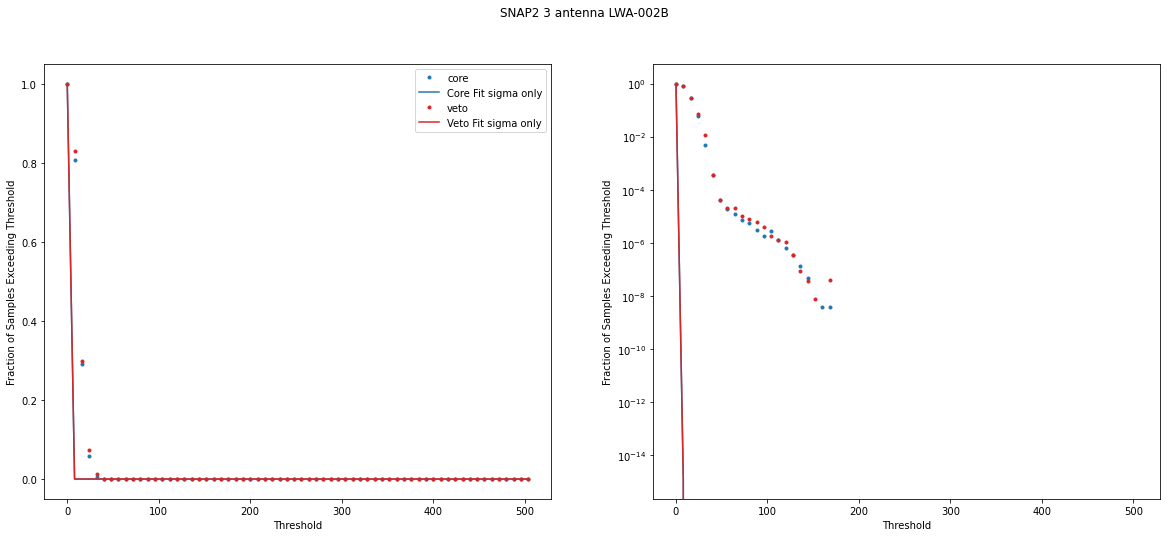

Did not find exactly one antpol for input 2
[]
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


TypeError: must be str, not list

<Figure size 1440x576 with 0 Axes>

In [11]:

results_core=np.load(fnamec)
results_veto=np.load(fnamev)

def prob_simple(x,s):
    #fraction of samples whose absolute value iexceeds a threshold x if the sample is described by a Gaussian PDF with zero mean and variance s^2
    p = 1 - 0.5*(sp.erf((x)/((2**0.5)*s)) + sp.erf((x)/((2**0.5)*s)))
    return p

#snap051673764473.2053006results_c.npy

rate_core = results_core/(2**28 - 1)
rate_veto = results_veto/(2**28 - 1)

corefitsigmas = np.zeros((64,11))
corefitsigmaerrs = np.zeros((64,11))
vetofitsigmas = np.zeros((64,11))
vetofitsigmaerrs = np.zeros((64,11))

for b in [3]: #list boards to make the plot for. b is the one-indexed snap number (i.e. it can be 1-11 inclusive)
    plt.suptitle('SNAP2 '+str(b))
    for a in range(64):
        antname=mapping.snap2_to_antpol(b,a)
        print(antname)
        print("Fit Core")
        popt1,pcov1 = oz.curve_fit(prob_simple,thresholds,rate_core[a,:,b])
        corefitsigmas[a]=popt1[0]
        corefitsigmaerrs[a]=pcov1[0]
        print(popt1)
        print(pcov1)

        print("Fit Veto")
        popt2,pcov2 = oz.curve_fit(prob_simple,thresholds,np.flip(rate_veto[a,:,b]))
        vetofitsigmas[a]=popt2[0]
        vetofitsigmaerrs[a]=pcov2[0]
        print(popt2)
        print(pcov2)

        model1 = prob_simple(thresholds,popt1[0])
        model2 = prob_simple(thresholds,popt2[0])

        plt.figure(figsize=(20,8))
        plt.suptitle('SNAP2 '+str(b)+' antenna ' +antname)

        plt.subplot(121)
        plt.xlabel("Threshold")
        plt.ylabel("Fraction of Samples Exceeding Threshold")
        plt.plot(thresholds,rate_core[a,:,b],'C0.',label='core')
        plt.plot(thresholds,model1,'C0-',label="Core Fit sigma only")

        plt.plot(np.flip(thresholds),rate_veto[a,:,b],'C3.',label='veto')
        plt.plot(thresholds,model2,'C3-',label="Veto Fit sigma only")

        plt.legend()

        plt.subplot(122)
        plt.xlabel("Threshold")
        plt.ylabel("Fraction of Samples Exceeding Threshold")
        plt.semilogy(thresholds,rate_core[a,:,b],'C0.',label='core')
        plt.semilogy(thresholds,model1,'C0-',label="Core Fit sigma only")

        plt.semilogy(np.flip(thresholds),rate_veto[a,:,b],'C3.',label='veto')
        plt.semilogy(thresholds,model2,'C3-',label="Veto Fit sigma only")
        plt.show()

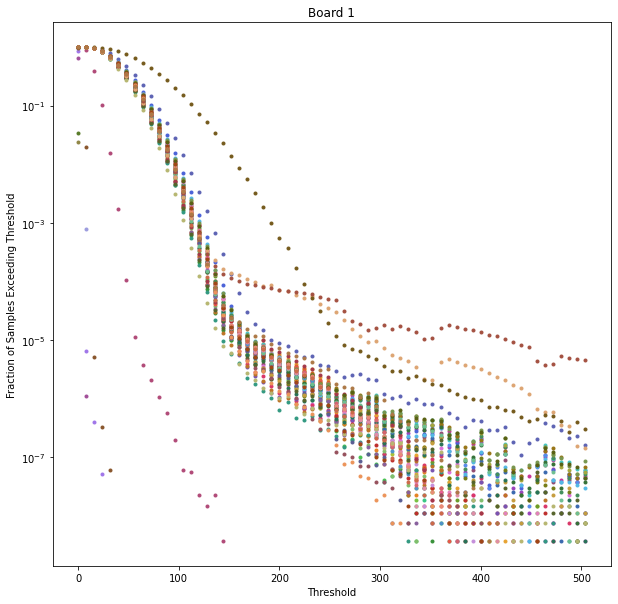

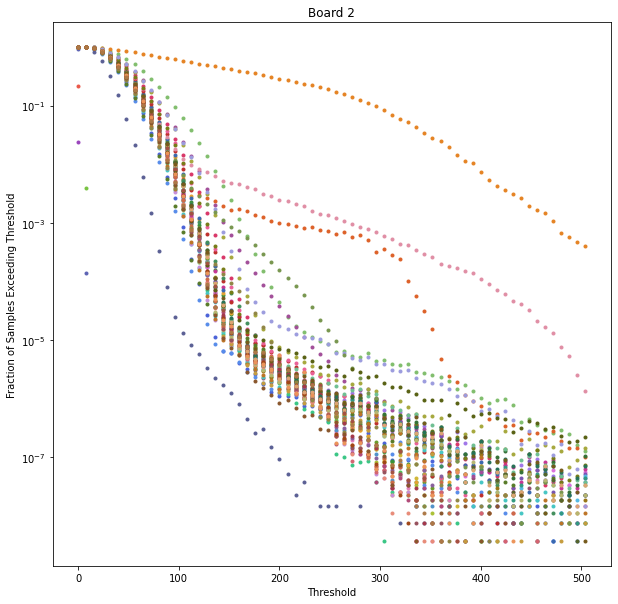

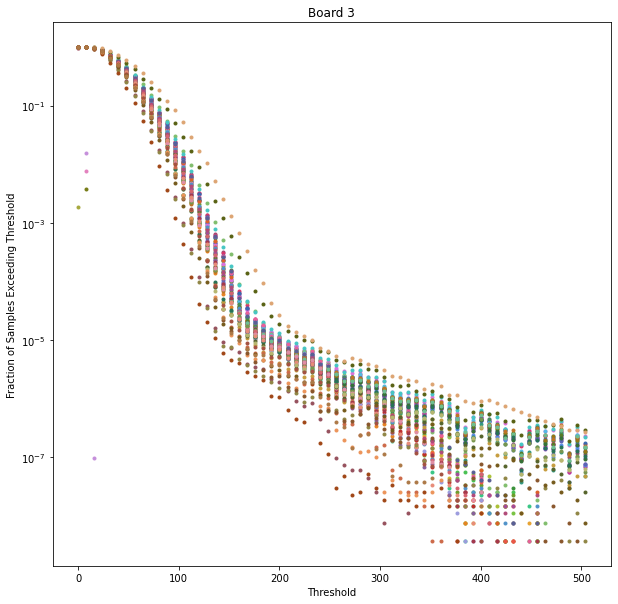

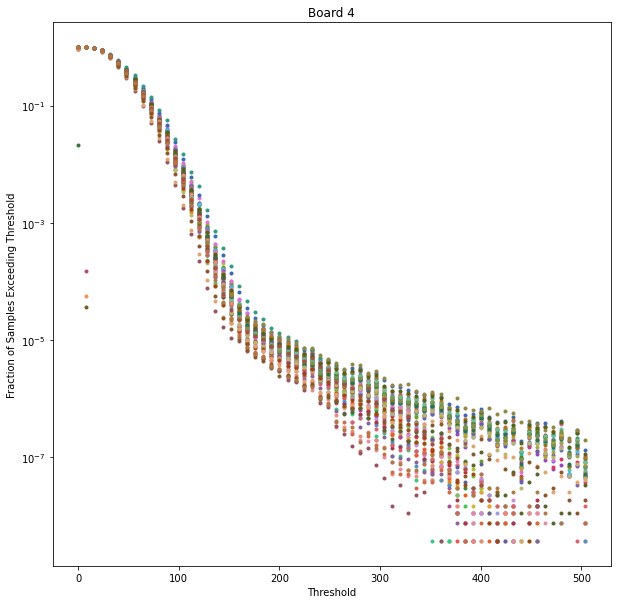

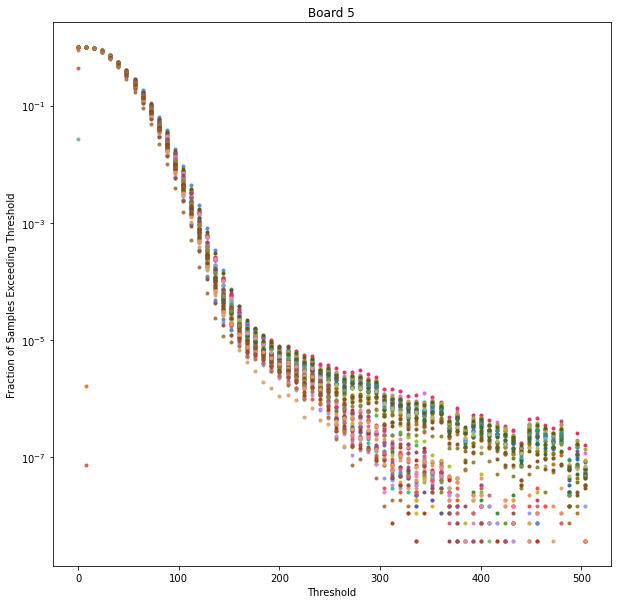

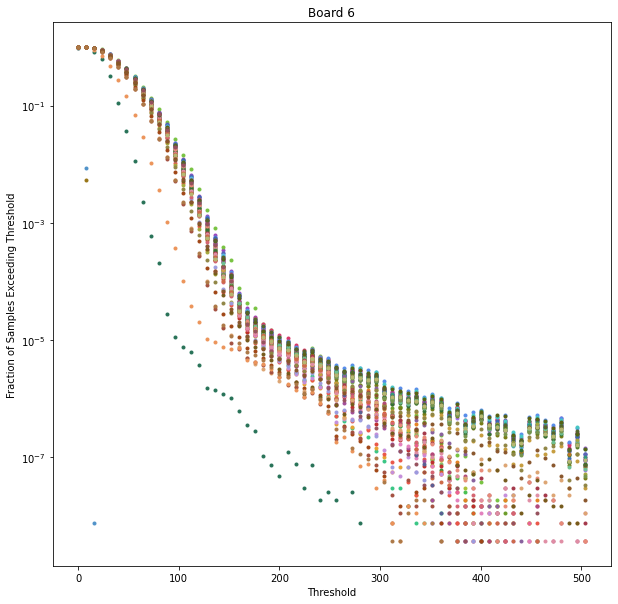

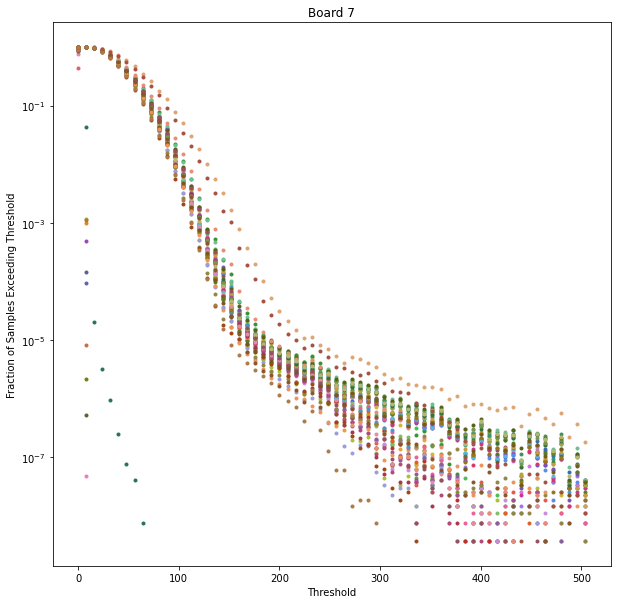

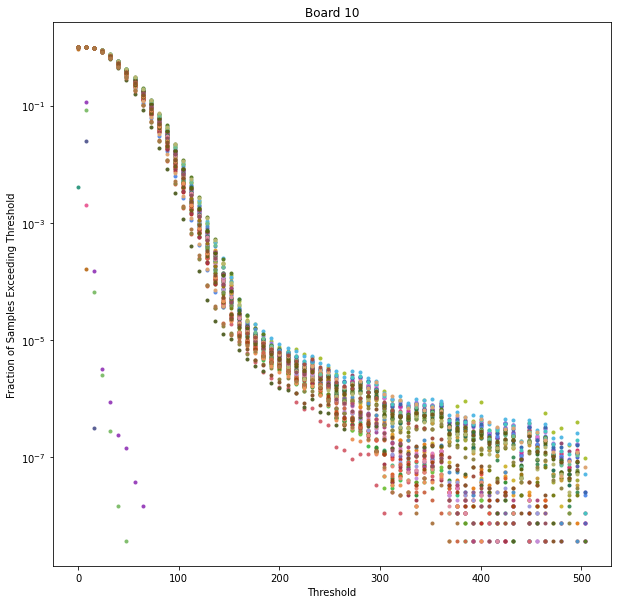

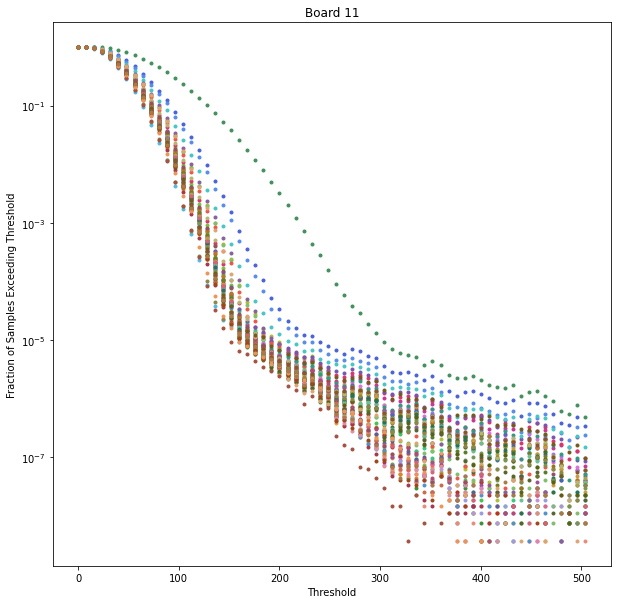

In [96]:

results_core=np.load(fnamec)
results_veto=np.load(fnamev)
rate_core = results_core/(2**28 - 1)
rate_veto = results_veto/(2**28 - 1)
thresholds = 8*np.asarray(range(64))
vthresholds = np.flip(thresholds)

colors = ["#934b71","#48c152","#9a44bc","#78c341","#4a62d8","#abc136","#a076e9","#6b9c29","#dd70db","#389139","#c63695","#39c685","#d93668","#81be6d","#7854b1","#d0b737","#578cea","#e7a332","#5d63b4","#e58323","#3a69af","#dd6128","#54b9e5","#be2e2c","#46c6c4","#ea5749","#329981","#ea6098","#428f5c","#a24e99","#a6a83d","#c58fdb","#767c16","#e381be","#587b28","#9c9cde","#987516","#5092c9","#bd7426","#5a5f94","#c69d3f","#88609d","#357137","#b14a78","#6ebf92","#a4384a","#277257","#d56470","#78964f","#e08ea5","#586113","#e88c79","#56642b","#cd6a49","#b7b771","#96515d","#908645","#a04616","#dda573","#a45141","#755a1c","#ec945a","#89562c","#ad7947"]
for b in range(11):
    plt.figure(figsize=(10,10))
    plt.title("Board "+str(b+1))
    for a in range(64):
        plt.semilogy(thresholds,rate_core[a,:,b],'.',color=colors[a],label=str(a))

    plt.xlabel("Threshold")
    plt.ylabel("Fraction of Samples Exceeding Threshold")
   # plt.legend()
    plt.show()


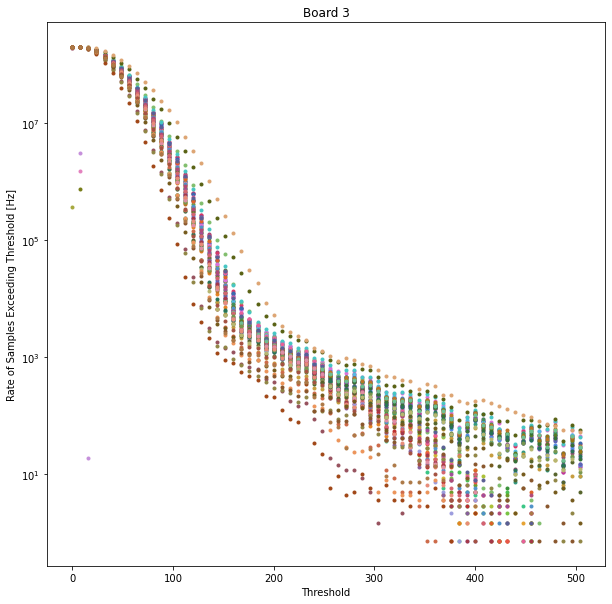

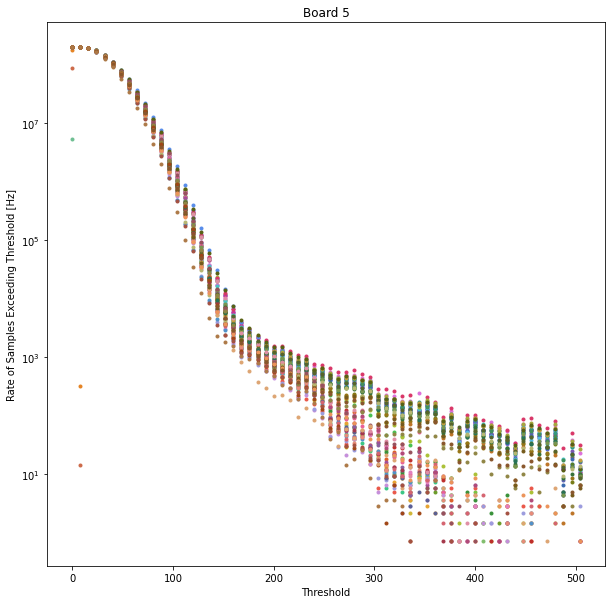

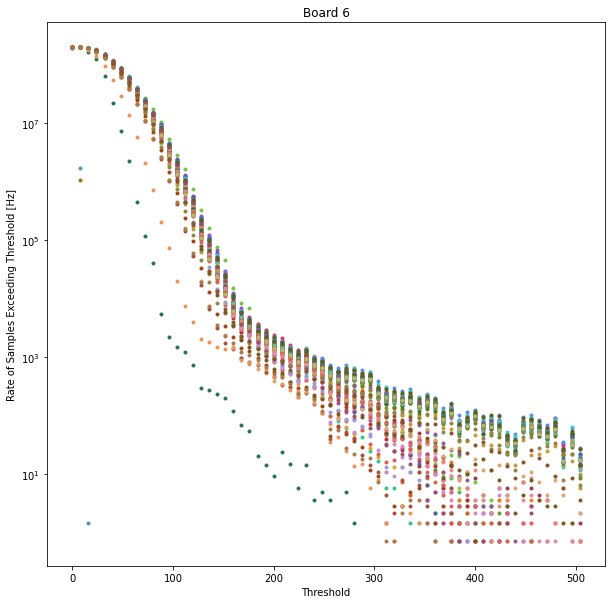

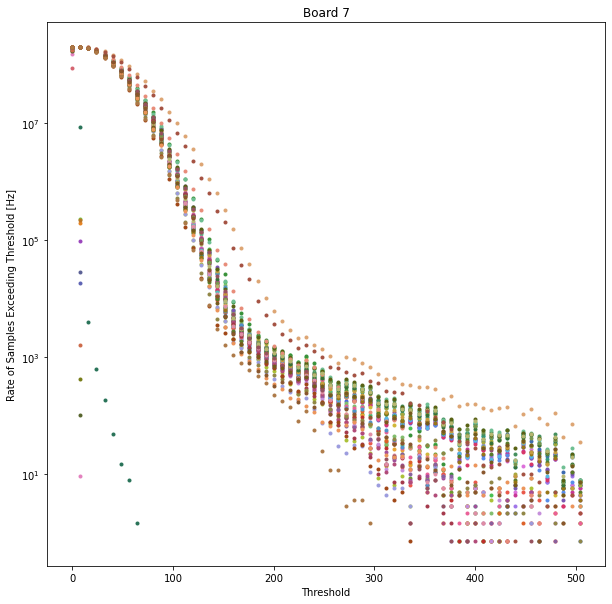

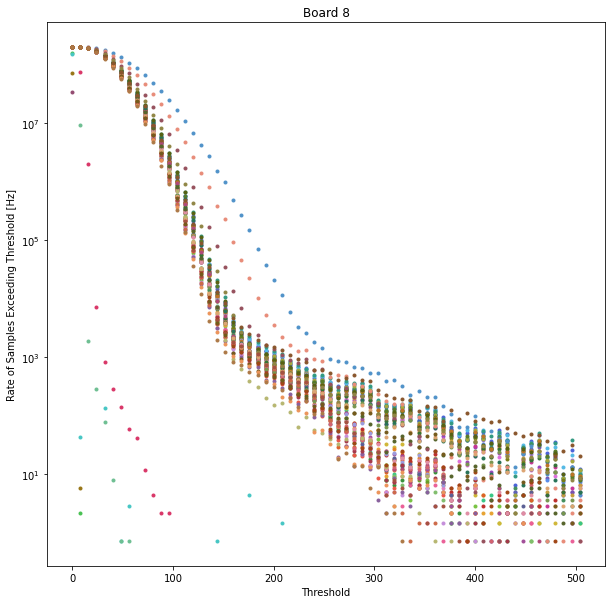

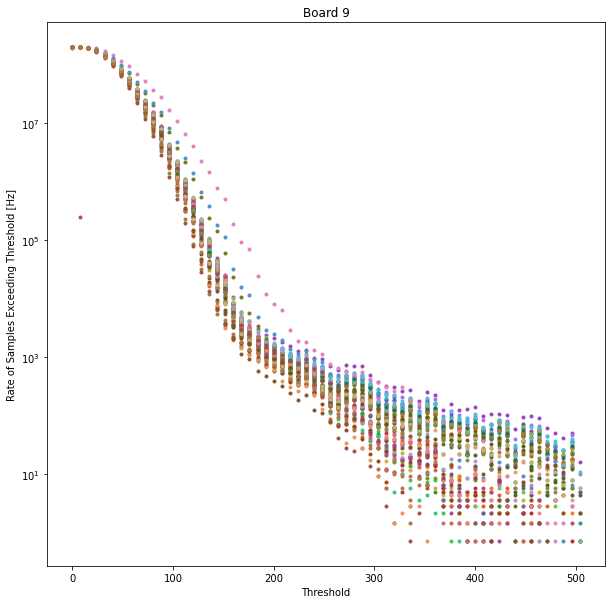

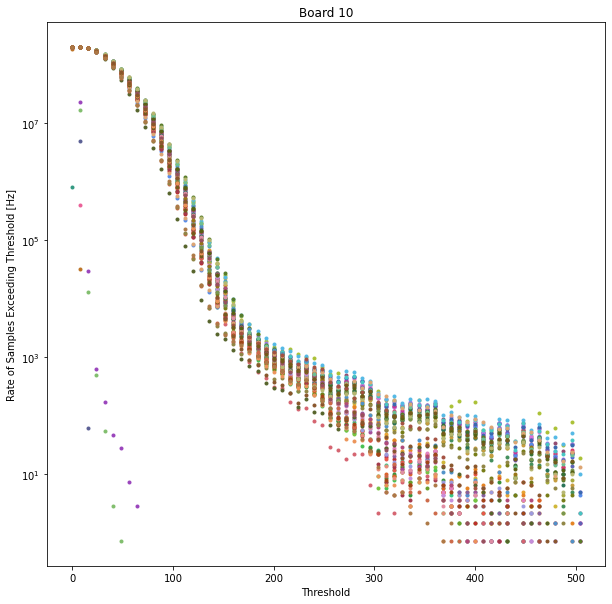

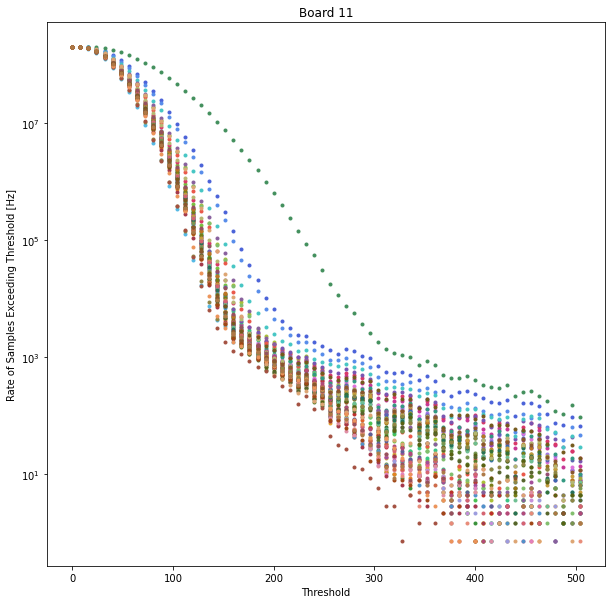

In [102]:
results_core=np.load(fnamec)
results_veto=np.load(fnamev)
rate_core = results_core/(2**28 - 1)
rate_veto = results_veto/(2**28 - 1)
thresholds = 8*np.asarray(range(64))
vthresholds = np.flip(thresholds)

colors = ["#934b71","#48c152","#9a44bc","#78c341","#4a62d8","#abc136","#a076e9","#6b9c29","#dd70db","#389139","#c63695","#39c685","#d93668","#81be6d","#7854b1","#d0b737","#578cea","#e7a332","#5d63b4","#e58323","#3a69af","#dd6128","#54b9e5","#be2e2c","#46c6c4","#ea5749","#329981","#ea6098","#428f5c","#a24e99","#a6a83d","#c58fdb","#767c16","#e381be","#587b28","#9c9cde","#987516","#5092c9","#bd7426","#5a5f94","#c69d3f","#88609d","#357137","#b14a78","#6ebf92","#a4384a","#277257","#d56470","#78964f","#e08ea5","#586113","#e88c79","#56642b","#cd6a49","#b7b771","#96515d","#908645","#a04616","#dda573","#a45141","#755a1c","#ec945a","#89562c","#ad7947"]
for b in range(11):
    plt.figure(figsize=(10,10))
    plt.title("Board "+str(b+1))
    for a in range(64):
        plt.semilogy(thresholds,1.96e8*rate_core[a,:,b],'.',color=colors[a],label=str(a))

    plt.xlabel("Threshold")
    plt.ylabel("Rate of Samples Exceeding Threshold [Hz]")
   # plt.legend()
    plt.show()

## Threshold scan for every board individually but in (approximately) parallel

In [108]:

#set up coincidencer
trigger_power_thresh=0 #will set later, in steps during scan
veto_power_thresh=0
trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=0
antenna_number_thresh=0 # will set later, in steps during scan
veto_number_thresh=0
core_roles_array=np.ones(64,dtype=int)
veto_roles_array=np.ones(64,dtype=int) #not using for now

[setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array) for casperbrd in casperbrds]

# define settings to loop through
voltage_thresh=np.asarray([100,150,175,200,225,250,275,300,350])
ant_number_thresh=np.asarray([4,7,10,20])
core_coincidences=np.zeros((len(voltage_thresh),len(ant_number_thresh),11))

for m in range(len(ant_number_thresh)):
    [setvalue(casperbrd,'antenna_number_thresh','cr_registers.xlsx',int(ant_number_thresh[m])) for casperbrd in casperbrds]
    for i in range(len(voltage_thresh)):
        t_c = voltage_thresh[i]
        [setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t_c**2)) for casperbrd in casperbrds]
        time.sleep(2.75)  #have to wait for it to update
        for b, casperbrd in enumerate(casperbrds):
            veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
            core_coincidences[i,m,b]=core_coincidence

In [109]:
np.save(fnameout,core_coincidences)

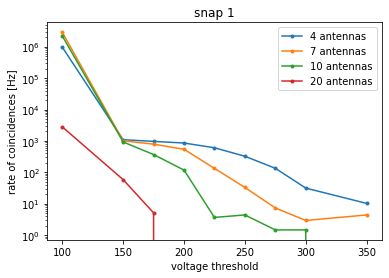

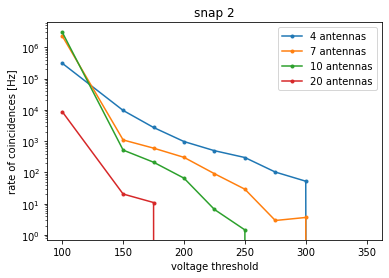

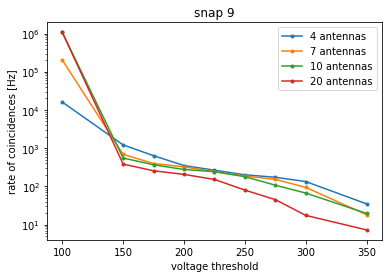

In [112]:
core_coincidences=np.load(fnameout)
core_coincidences_rate=core_coincidences*(1.96e8/((2**28) - 1))
for b in range(11):
    plt.figure()
    plt.title("snap "+str(b+1))

    for m in range(len(ant_number_thresh)):
        plt.semilogy(voltage_thresh,core_coincidences_rate[:,m,b],'.-',label=str(ant_number_thresh[m])+ ' antennas')
    plt.legend()
    plt.xlabel('voltage threshold')
    plt.ylabel('rate of coincidences [Hz]')

This are plots of the number of events meeting the coincident trigger condition, for different voltage thresholds and antenna number thresholds. Note that no veto antennas were set and each measurement is done sequentially, in a dynamic RFI environment.

## Scan using veto antennas 



In [120]:
def do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers):
    plt.figure()
    for i in range(11):
        plt.title('Core triggers [Hz]')  #note core is ALL antennas
        plt.semilogy(core_triggers[:,i]*(1.96e8/((2**28) - 1)),label='snap'+str(i+1))
    plt.legend()

    plt.figure()
    for i in range(11):
        plt.title('Veto triggers [Hz]')
        plt.semilogy(veto_triggers[:,i]*(1.96e8/((2**28) - 1)),label='snap'+str(i+1))
    plt.legend()

    plt.figure()
    for i in range(11):
        plt.title('Veto triggers [Hz]')
        plt.plot(veto_triggers[:,i]*(1.96e8/((2**28) - 1)),label='snap'+str(i+1))
    plt.legend()

    plt.figure()
    for i in range(11):
        plt.title('Total cycles vetoed [Hz]')
        plt.semilogy(veto_cycles[:,i]*(1.96e8/((2**28) - 1)),label='snap'+str(i+1))
    plt.legend()

    plt.figure()
    for i in range(11):
        plt.title('Total cycles core triggers [Hz]')
        plt.semilogy(core_cycles[:,i]*(1.96e8/((2**28) - 1)),label='snap'+str(i+1))
    plt.legend()

    plt.figure()
    for i in range(11):
        plt.title('Successful triggers [Hz]')
        plt.semilogy(successful_triggers[:,i]*(1.96e8/((2**28) - 1)),label='snap'+str(i+1))
    plt.legend()

    plt.figure()
    for i in range(11):
        plt.title('Readout dones [Hz]')
        plt.semilogy(readout_dones[:,i]*(1.96e8/((2**28) - 1)),label='snap'+str(i+1))
    plt.legend()
    return

In [85]:
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-2-21.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-2-21.npy')
for p in range(11):
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]
    print(veto_roles_array)

"current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-2-21.npy')\ncurrent_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-2-21.npy')\nfor p in range(11):\n    veto_roles_array=current_ok_vetos[p,:]\n    core_roles_array=current_ok_core[p,:]\n    print(veto_roles_array)"

### File with veto roles for both polarizations.  Trigger power threshold 200. Veto power threshold 200.

In [114]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[0,1,2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-4-3.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-4-3.npy')

trigger_power_thresh=200**2
veto_power_thresh=200**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=7 
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,0,63,1,63,2,63,3,63,4,63,5]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger


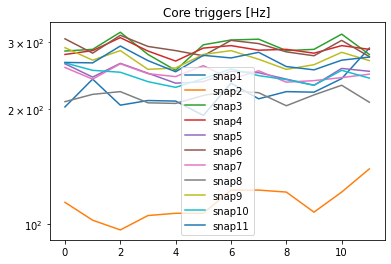

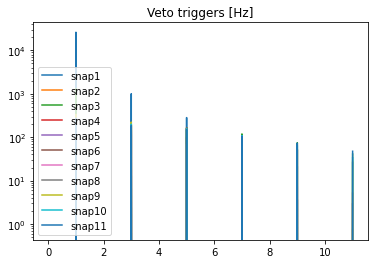

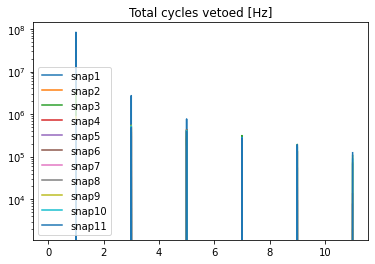

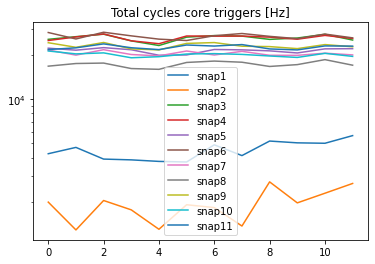

In [121]:
do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers)

### File with veto roles for A  polarization only.  Trigger power threshold 200. Veto power threshold 200.


In [122]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[0,1,2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-4-3_A_only.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-4-3.npy')

trigger_power_thresh=200**2
veto_power_thresh=200**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=7 
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,0,63,1,63,2,63,3,63,4,63,5]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger


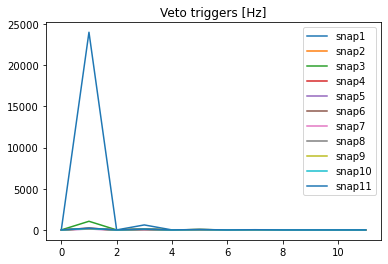

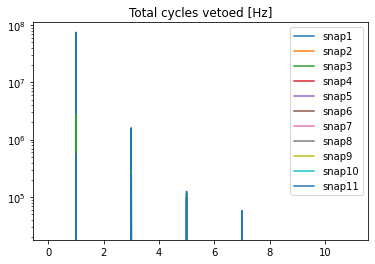

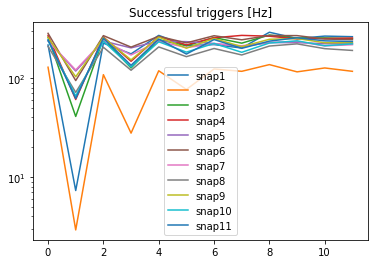

In [124]:
do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers)

### File with veto roles for B  polarization only.  Trigger power threshold 200. Veto power threshold 200.


In [125]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[0,1,2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-4-3_B_only.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-4-3.npy')

trigger_power_thresh=200**2
veto_power_thresh=200**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=7 
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,0,63,1,63,2,63,3,63,4,63,5]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger


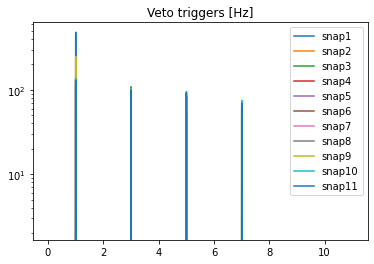

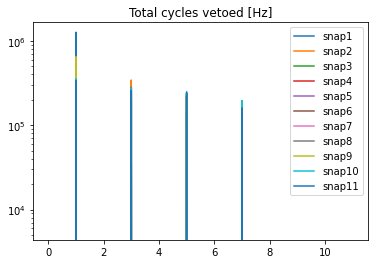

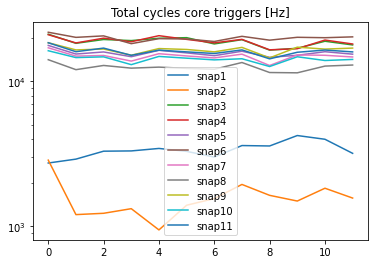

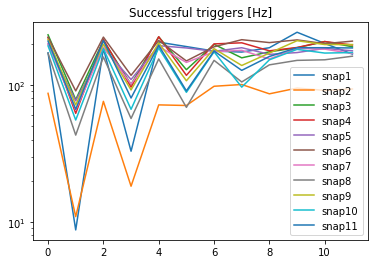

In [126]:
do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers)

### File with veto roles for both polarizations.  Trigger power threshold 200. Veto power threshold 200. Core number threshold 20


In [127]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[0,1,2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-4-3.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-4-3.npy')

trigger_power_thresh=200**2
veto_power_thresh=200**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=20
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,0,63,1,63,2,63,3,63,4,63,5]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger


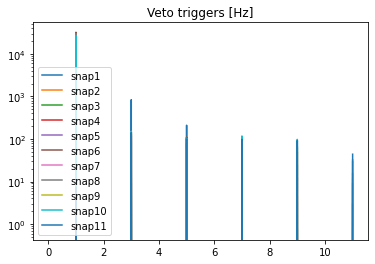

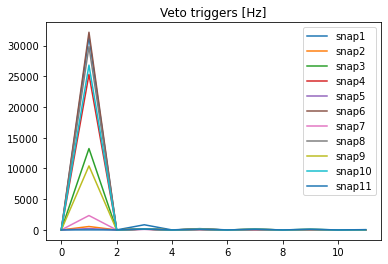

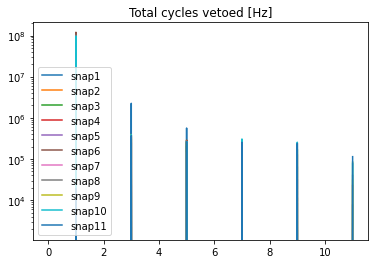

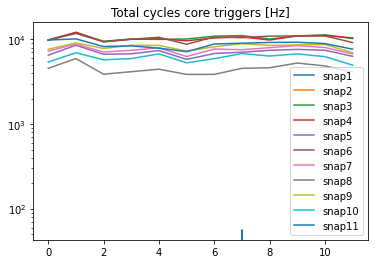

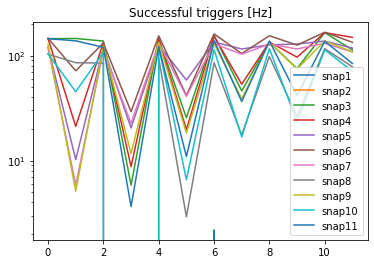

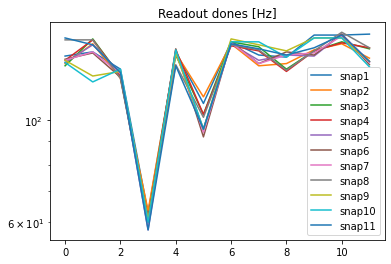

In [128]:
do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers)

### File with veto roles for both polarizations.  Trigger power threshold 200. Veto power threshold 150. Core number threshold 20


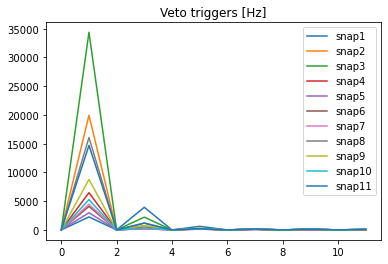

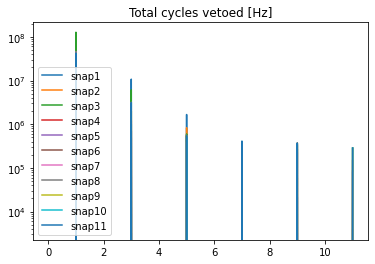

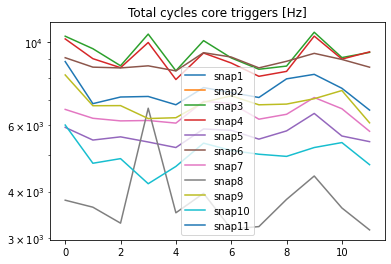

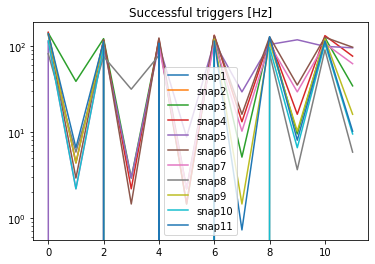

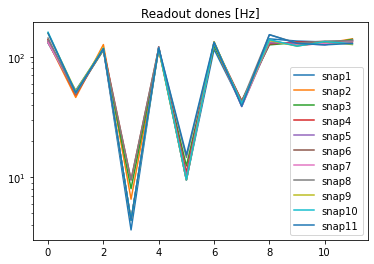

In [129]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[0,1,2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-4-3.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-4-3.npy')

trigger_power_thresh=200**2
veto_power_thresh=150**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=20
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,0,63,1,63,2,63,3,63,4,63,5]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger
        
do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers)

### File with veto roles for A polarization.  Trigger power threshold 200. Veto power threshold 150. Core number threshold 20

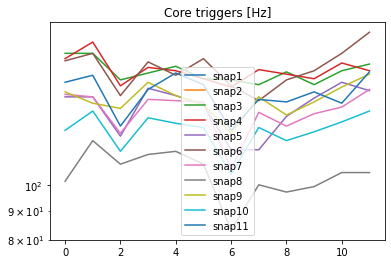

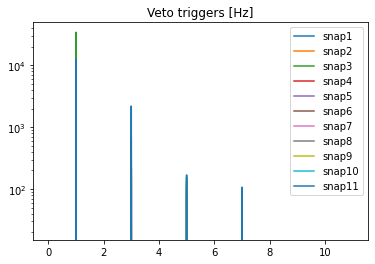

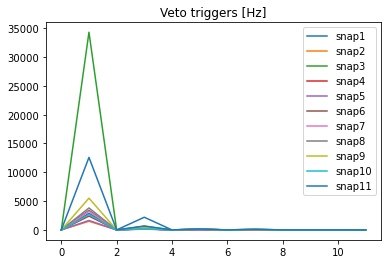

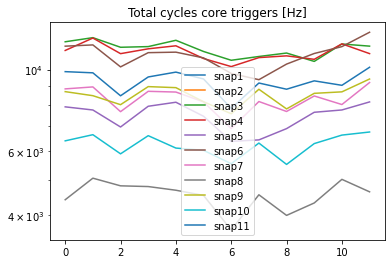

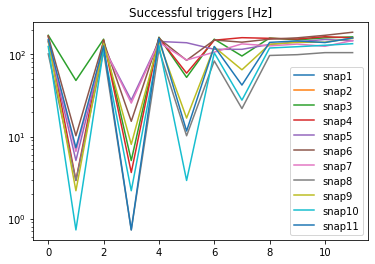

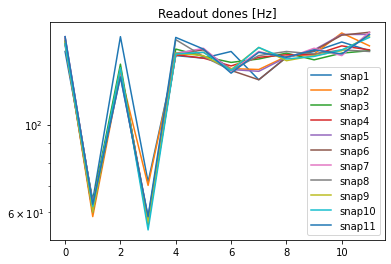

In [130]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[0,1,2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-4-3_A_only.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-4-3.npy')

trigger_power_thresh=200**2
veto_power_thresh=150**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=20
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,0,63,1,63,2,63,3,63,4,63,5]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger
        
do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers)

### File with veto roles for B polarization.  Trigger power threshold 200. Veto power threshold 150. Core number threshold 20

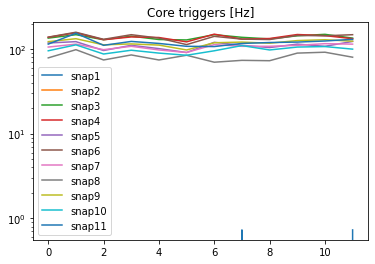

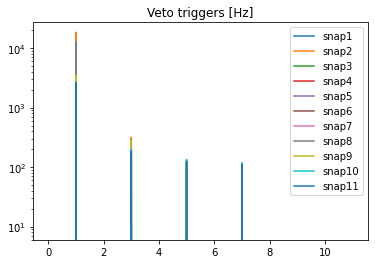

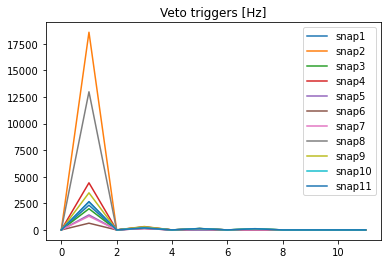

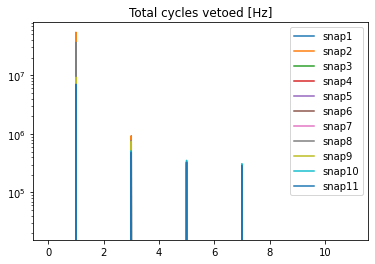

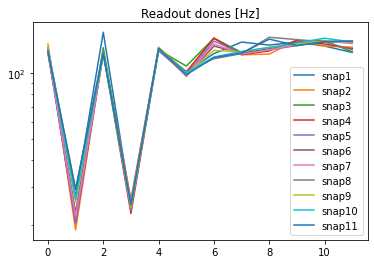

In [132]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[0,1,2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-4-3_B_only.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-4-3.npy')

trigger_power_thresh=200**2
veto_power_thresh=150**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=20
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,0,63,1,63,2,63,3,63,4,63,5]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger
        
do_plots(core_cycles,veto_cycles,core_triggers,veto_triggers,readout_dones,successful_triggers)

### Completely reset trigger on all boards. It's good to run this at the end before running something else to configure the trigger for observing.

In [133]:
## Completely reset trigger on all boards
veto_roles_array=np.zeros(64,dtype=int)
core_roles_array=np.zeros(64,dtype=int)
for p in range(11):
    casperbrd=casperbrds[p]
    setup_coincidencer(casperbrd,0,
                          0,
                          0,
                          0,
                          0,
                          0,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0)


## Muons

In [22]:
t1=time.time()

thresholds = 2*np.asarray(range(16))
vthresholds = np.flip(thresholds)
results_core = np.zeros((64,16,11))
results_veto = np.zeros((64,16,11))

[setup_data_source(casperbrd,"adc") for casperbrd in casperbrds]


for i in range(len(thresholds)):
    t_c = thresholds[i]
    t_v = vthresholds[i]
    [setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t_c**2)) for casperbrd in casperbrds]
    [setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int(t_v**2)) for casperbrd in casperbrds]
    time.sleep(2.75)  #have to wait for it to update
    
    #read results for this threshold
    b=3  #snap04
    casperbrd=casperbrds[b]
    core,veto = read_threshold_rates(casperbrd)
    results_core[:,i,b] = core
    results_veto[:,i,b] = veto

t2=time.time()
print('Duration ',t2-t1)

Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Duration  127.69209146499634


In [26]:
thresholds = 2*np.asarray(range(16))

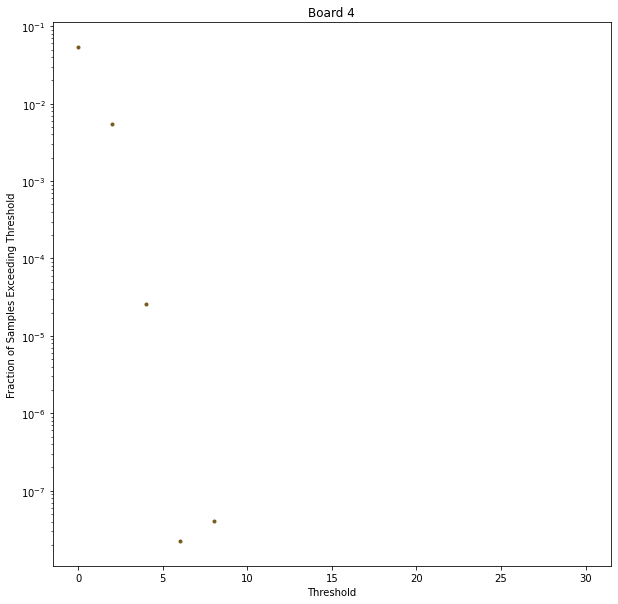

In [28]:
colors = ["#934b71","#48c152","#9a44bc","#78c341","#4a62d8","#abc136","#a076e9","#6b9c29","#dd70db","#389139","#c63695","#39c685","#d93668","#81be6d","#7854b1","#d0b737","#578cea","#e7a332","#5d63b4","#e58323","#3a69af","#dd6128","#54b9e5","#be2e2c","#46c6c4","#ea5749","#329981","#ea6098","#428f5c","#a24e99","#a6a83d","#c58fdb","#767c16","#e381be","#587b28","#9c9cde","#987516","#5092c9","#bd7426","#5a5f94","#c69d3f","#88609d","#357137","#b14a78","#6ebf92","#a4384a","#277257","#d56470","#78964f","#e08ea5","#586113","#e88c79","#56642b","#cd6a49","#b7b771","#96515d","#908645","#a04616","#dda573","#a45141","#755a1c","#ec945a","#89562c","#ad7947"]
for b in [3]:
    plt.figure(figsize=(10,10))
    plt.title("Board "+str(b+1))
    for a in [60]:
        plt.semilogy(thresholds,rate_core[a,:,b],'.',color=colors[a],label=str(a))

    plt.xlabel("Threshold")
    plt.ylabel("Fraction of Samples Exceeding Threshold")
   # plt.legend()
    plt.show()

LWA-002A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 432x288 with 0 Axes>

LWA-002B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


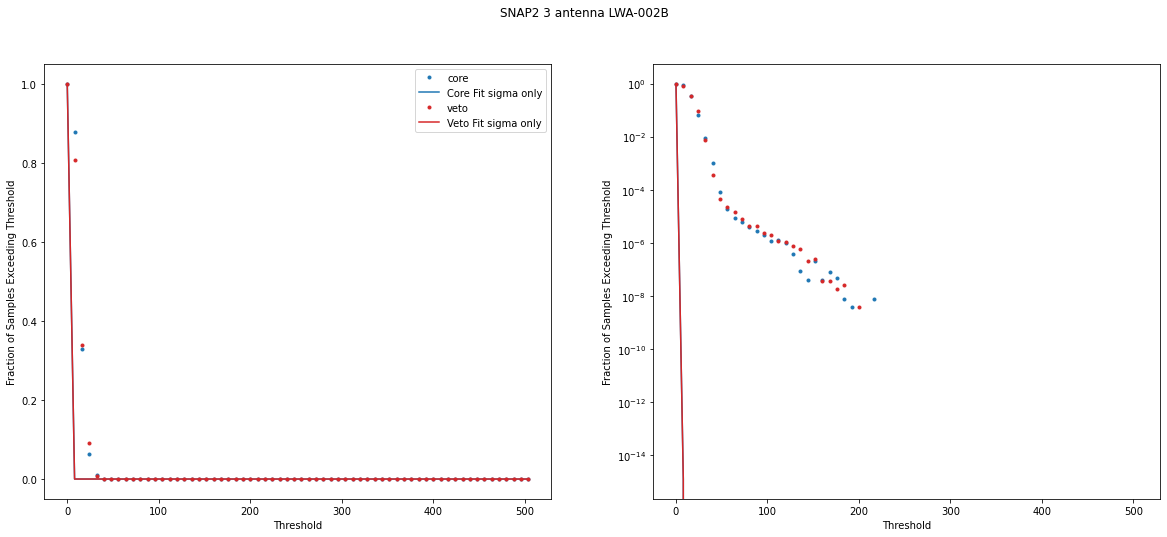

Did not find exactly one antpol for input 2
[]
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


TypeError: must be str, not list

<Figure size 1440x576 with 0 Axes>

In [18]:


def prob_simple(x,s):
    #fraction of samples whose absolute value iexceeds a threshold x if the sample is described by a Gaussian PDF with zero mean and variance s^2
    p = 1 - 0.5*(sp.erf((x)/((2**0.5)*s)) + sp.erf((x)/((2**0.5)*s)))
    return p

#snap051673764473.2053006results_c.npy

rate_core = results_core/(2**28 - 1)
rate_veto = results_veto/(2**28 - 1)

corefitsigmas = np.zeros((64,11))
corefitsigmaerrs = np.zeros((64,11))
vetofitsigmas = np.zeros((64,11))
vetofitsigmaerrs = np.zeros((64,11))

for b in [3]: #list boards to make the plot for. b is the one-indexed snap number (i.e. it can be 1-11 inclusive)
    plt.suptitle('SNAP2 '+str(b))
    for a in range(64):
        antname=mapping.snap2_to_antpol(b,a)
        print(antname)
        print("Fit Core")
        popt1,pcov1 = oz.curve_fit(prob_simple,thresholds,rate_core[a,:,b])
        corefitsigmas[a]=popt1[0]
        corefitsigmaerrs[a]=pcov1[0]
        print(popt1)
        print(pcov1)

        print("Fit Veto")
        popt2,pcov2 = oz.curve_fit(prob_simple,thresholds,np.flip(rate_veto[a,:,b]))
        vetofitsigmas[a]=popt2[0]
        vetofitsigmaerrs[a]=pcov2[0]
        print(popt2)
        print(pcov2)

        model1 = prob_simple(thresholds,popt1[0])
        model2 = prob_simple(thresholds,popt2[0])

        plt.figure(figsize=(20,8))
        plt.suptitle('SNAP2 '+str(b)+' antenna ' +antname)

        plt.subplot(121)
        plt.xlabel("Threshold")
        plt.ylabel("Fraction of Samples Exceeding Threshold")
        plt.plot(thresholds,rate_core[a,:,b],'C0.',label='core')
        plt.plot(thresholds,model1,'C0-',label="Core Fit sigma only")

        plt.plot(np.flip(thresholds),rate_veto[a,:,b],'C3.',label='veto')
        plt.plot(thresholds,model2,'C3-',label="Veto Fit sigma only")

        plt.legend()

        plt.subplot(122)
        plt.xlabel("Threshold")
        plt.ylabel("Fraction of Samples Exceeding Threshold")
        plt.semilogy(thresholds,rate_core[a,:,b],'C0.',label='core')
        plt.semilogy(thresholds,model1,'C0-',label="Core Fit sigma only")

        plt.semilogy(np.flip(thresholds),rate_veto[a,:,b],'C3.',label='veto')
        plt.semilogy(thresholds,model2,'C3-',label="Veto Fit sigma only")
        plt.show()